## Descriptive Statistics on Asheville Airbnb data

### Project Title: <br>
Exploring the Factors Influencing Airbnb Rental Prices in a Major City

### Project Description: <br>
In this project,I have analyzed a dataset of Airbnb rental prices and associated features in a major city to identify the factors that influence rental prices. I used data analysis techniques to identify correlations and relationships between the variables in the dataset, and build a model to predict rental prices based on the selected features.
Steps: <br>
- Collect Airbnb rental data for a major city, including features such as property type, neighborhood, number of bedrooms, number of bathrooms, availability, and rental price.<br>
- Explore the data using descriptive statistics and visualizations to gain an understanding of the dataset.<br>
- Use correlation and regression analysis to identify the factors that influence rental prices. Some potential factors to explore include location, property type, number of bedrooms, and availability.<br> 
- Build a predictive model to estimate rental prices based on the selected features.<br>
- Evaluate the accuracy of the model and identify any areas for improvement.<br>
- Create visualizations and a summary report to communicate your findings.<br>


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Asheville-North Carolina-listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,100,10,91,2022-10-08,0.66,2,180,1,NaN
1,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,100,1,374,2022-12-04,2.70,7,300,27,NaN
2,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57864,-82.59578,Private room,66,1,67,2020-01-01,0.49,7,0,0,NaN
3,156926,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57864,-82.59578,Shared room,29,1,319,2022-11-14,2.32,7,313,23,NaN
4,197263,Tranquil Room & Private Bath,961396,Timo,NaN,28806,35.57808,-82.63689,Private room,45,2,66,2022-11-21,0.52,2,83,24,NaN


In [3]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [4]:
neighborhood = df['neighbourhood'].value_counts().reset_index()
neighborhood.columns = ['neighborhood_id', 'count']
neighborhood['percent'] = neighborhood['count']/neighborhood['count'].sum()*100
#neighborhood.unique()
neighborhood

,neighborhood_id,count,percent
0,28806,912,29.485936
1,28801,651,21.047527
2,28803,433,13.999353
3,28804,405,13.094083
4,28805,310,10.022632
5,28704,211,6.821856
6,28715,92,2.974458
7,28732,79,2.554155


[Text(0, 0, '28806'),
 Text(1, 0, '28801'),
 Text(2, 0, '28803'),
 Text(3, 0, '28804'),
 Text(4, 0, '28805'),
 Text(5, 0, '28704'),
 Text(6, 0, '28715'),
 Text(7, 0, '28732')]

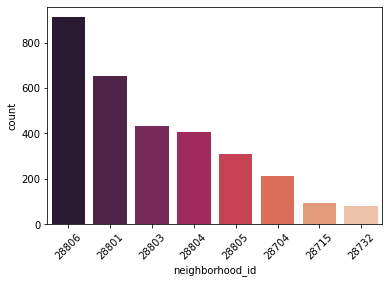

In [5]:
ax = sns.barplot(x="neighborhood_id", y="count", data=neighborhood,
                 order=neighborhood.sort_values('count',ascending = False).neighborhood_id
                , palette = "rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

neighborhood_id 28806 seems to have more Listings in the dataset.

In [6]:
# Now we will look at the type of Rooms available in the Listing.

available_rooms = df['room_type'].value_counts().reset_index()
available_rooms.columns = ['room_type', 'count']
available_rooms['percent'] = available_rooms['count']/available_rooms['count'].sum() * 100
available_rooms['percent'] =  ['%.2f' % elem for elem in available_rooms['percent']]
available_rooms

,room_type,count,percent
0,Entire home/apt,2674,86.45
1,Private room,395,12.77
2,Hotel room,16,0.52
3,Shared room,8,0.26


In [7]:

labels = available_rooms.room_type.tolist()
sizes = available_rooms['percent'].tolist()
roomdata = dict(zip(labels, sizes))
roomdata 

{'Entire home/apt': '86.45',
 'Private room': '12.77',
 'Hotel room': '0.52',
 'Shared room': '0.26'}

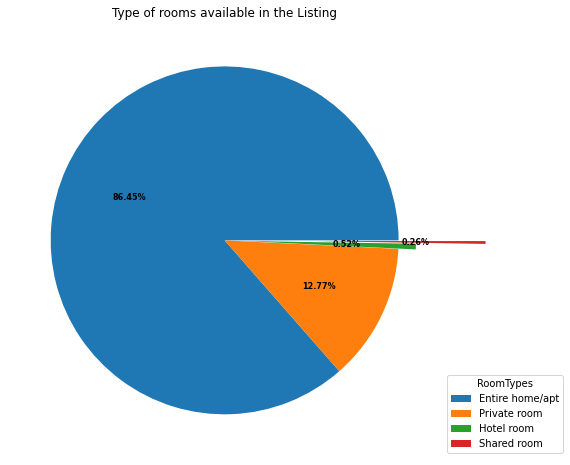

In [8]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))
labels = available_rooms.room_type.tolist()
sizes = available_rooms['percent'].tolist()
sizes = [float(x) for x in sizes]
explode = (0, 0, 0.1, 0.5)

wedges, texts, autotexts = ax.pie(sizes, autopct='%1.2f%%',explode=explode,
                                  textprops=dict(color="Black"))

ax.legend(wedges, labels,
          title="RoomTypes",
          loc="lower left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Type of rooms available in the Listing")
plt.show()

### Quantitative Data - Univariate Analysis
Variables that have a numerical value(Quantity) that we can perform mathematical operations on.

divided into 2:
- Discrete: Age, Number of Children in a room etc.. 
- Continuous: Height, Weight etc..


In [9]:
price = df['price']
number_of_reviews = df['number_of_reviews']

**Histogram** - A type of Univariate analysis and a Common way to visualize Quantitative data. Histograms are useful for visualizing the shape of a distribution, as well as identifying any outliers or unusual patterns in the data.

Text(0.5, 1.0, 'Histogram of Listing Prices Without KDE')

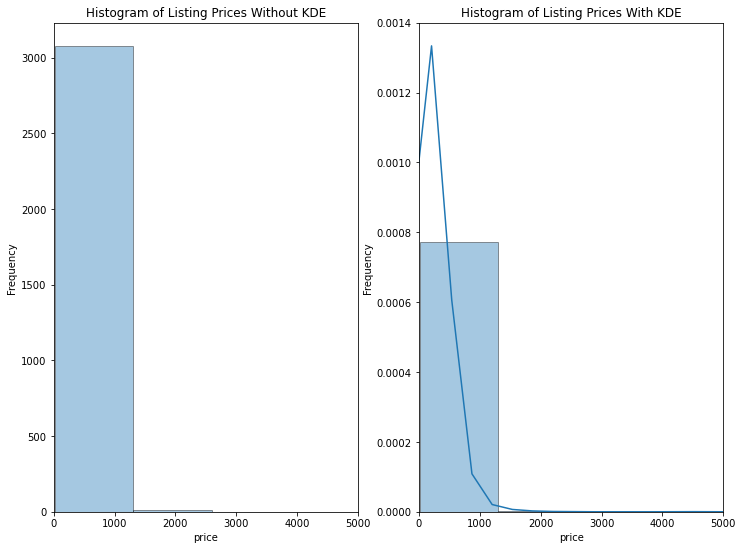

In [10]:
import warnings
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,9))

sns.distplot(price, hist=True, kde=False, hist_kws={'edgecolor':'black'}, ax=ax[0])
sns.distplot(price, hist=True, kde=True, hist_kws={'edgecolor':'black'}, ax=ax[1])

ax[1].set_title('Histogram of Listing Prices With KDE')
ax[1].set_xlim(0,5000)
ax[1].set_ylabel('Frequency')

ax[0].set_ylabel('Frequency')
ax[0].set_xlim(0,5000)
ax[0].set_title('Histogram of Listing Prices Without KDE')

In [11]:
price.describe()

count     3093.000000
mean       234.616877
std       1336.423738
min         15.000000
25%         97.000000
50%        142.000000
75%        235.000000
max      64452.000000
Name: price, dtype: float64

### Boxplots for Quantitative Data 
Let's take the availability of the rooms in a year and visually check the 5-number summary.

A Boxplot is basically a visual Picture of the 5-number summary we saw above.
The length of the box is the IQR(Q3 - Q1), a nice measure of spread.

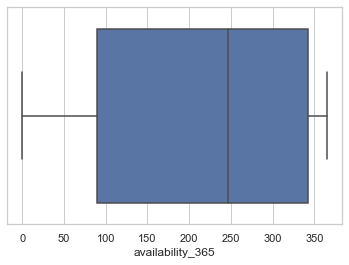

In [12]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["availability_365"])


### How is price related to number of reviews?

<AxesSubplot:xlabel='price', ylabel='number_of_reviews'>

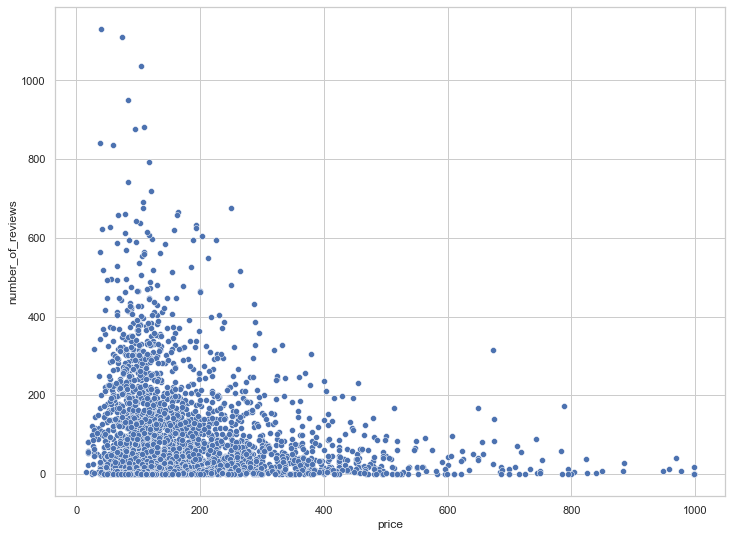

In [17]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 9
# since the prices above 1000 are rare we consider them as outlier to make a better graph
prices = df[df['price'] < 1000]
sns.scatterplot(x='price', y="number_of_reviews", data=prices)

### How does number of bedrooms affect review on cleanliness across room types?


In [148]:
ashvile_list = pd.read_csv('Asheville_listings.csv')
ashvile_list.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,108061,https://www.airbnb.com/rooms/108061,20221221041414,2022-12-21,city scrape,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental $1...,"I love my neighborhood! Its friendly, easy-goi...",https://a0.muscache.com/pictures/miso/Hosting-...,320564,...,4.80,4.84,4.48,NaN,f,2,2,0,0,0.66
1,155305,https://www.airbnb.com/rooms/155305,20221221041414,2022-12-21,city scrape,Cottage! BonPaul + Sharky's Hostel,<b>The space</b><br />Pet friendly private cot...,"We are within easy walk of pubs, breweries, mu...",https://a0.muscache.com/pictures/8880711/cf38d...,746673,...,4.74,4.93,4.54,NaN,f,7,1,2,4,2.70
2,156805,https://www.airbnb.com/rooms/156805,20221221041414,2022-12-21,previous scrape,"Private Room ""Ader"" at BPS Hostel",<b>The space</b><br />Private Rooms at Bon Pau...,"Easy walk to pubs, cafes, bakery, breweries, l...",https://a0.muscache.com/pictures/23447d55-fa7e...,746673,...,4.61,4.84,4.46,NaN,t,7,1,2,4,0.49
3,156926,https://www.airbnb.com/rooms/156926,20221221041414,2022-12-21,city scrape,"Mixed Dorm ""Top Bunk #1"" at BPS Hostel",This is a top bunk in the mixed dorm room<br /...,NaN,https://a0.muscache.com/pictures/98f4e655-c4d6...,746673,...,4.79,4.79,4.79,NaN,t,7,1,2,4,2.32
4,197263,https://www.airbnb.com/rooms/197263,20221221041414,2022-12-21,city scrape,Tranquil Room & Private Bath,"This is a comfy, peaceful and clean room with ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,961396,...,4.92,4.82,4.98,NaN,f,2,1,1,0,0.52


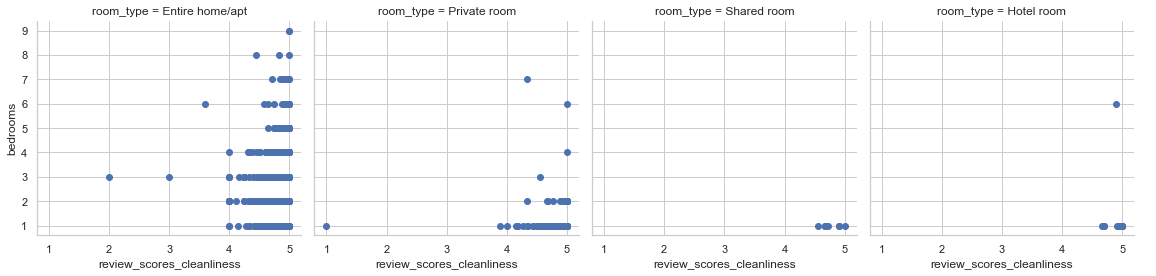

In [85]:
sns.FacetGrid(ashvile_list, col="room_type", size = 4).map(plt.scatter, "review_scores_cleanliness", "bedrooms").add_legend()



### How are the listings priced against its availability?

In [149]:
# first we have to format the price column(remove the $ and , from price)
from re import sub
from decimal import Decimal

ashvile_list['price'] = ashvile_list.price.apply(lambda x: Decimal(sub(r'[^\d.]', '', x)))
ashvile_list['price']

# here is another solution for formatting the price:
# float(price.replace("$", "").replace(".", "")[:-2]

0       100.00
1       100.00
2        66.00
3        29.00
4        45.00
         ...  
3088    144.00
3089     79.00
3090     84.00
3091    154.00
3092    417.00
Name: price, Length: 3093, dtype: object

(0.0, 400.0)

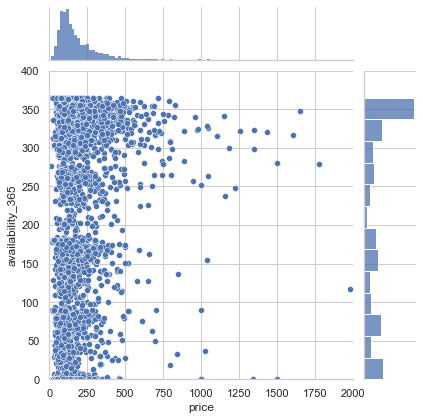

In [81]:
g = sns.jointplot(x="price", y="availability_365", data=ashvile_list)

g.ax_marg_x.set_xlim(0, 2000)
g.ax_marg_y.set_ylim(0, 400)

In [152]:
# cleaning the bathrooms column
ashvile_list['bathrooms'] = ashvile_list['bathrooms_text'].str.replace('[^\d.]', '')
ashvile_list['bathrooms'].replace('', np.nan, inplace=True)
#ashvile_list.dropna(subset=['bathrooms'], inplace=True)
#ashvile_list['bathrooms'] = ashvile_list['bathrooms'].astype(float)


In [160]:
ashvile_list[['bathrooms','bedrooms','beds','accommodates']] = ashvile_list[['bathrooms','bedrooms','beds','accommodates']].apply(pd.to_numeric)
ashvile_list = ashvile_list.dropna(subset=['bathrooms','bedrooms','beds','accommodates'])['beds'].unique()



array([ 1.,  6.,  2.,  3.,  4.,  8.,  5.,  7., 10.,  9., 11., 12., 13.,
       15., 20., 21., 16.])

In [165]:
explanatory_variables = ['bathrooms', 'bedrooms', 'beds', 'accommodates']
price_variables = ['price'] # here you can also include cleaning fee if your dataset has such data!
geom = ['latitude', 'longitude']  # we'll need this later
valid_listings = ashvile_list[explanatory_variables + price_variables + geom].dropna()
valid_listings['actual_price'] = valid_listings['price'].astype(float)
valid_listings = valid_listings.dropna()
valid_listings

,bathrooms,bedrooms,beds,accommodates,price,latitude,longitude,actual_price
0,1.0,1.0,1.0,2,100.00,35.606700,-82.555630,100.0
1,1.0,1.0,1.0,2,100.00,35.578640,-82.595780,100.0
2,2.5,1.0,1.0,2,66.00,35.578640,-82.595780,66.0
3,2.5,1.0,6.0,1,29.00,35.578640,-82.595780,29.0
4,1.0,1.0,1.0,2,45.00,35.578080,-82.636890,45.0
...,...,...,...,...,...,...,...,...
3088,1.0,1.0,1.0,2,144.00,35.568150,-82.528210,144.0
3089,1.0,1.0,1.0,2,79.00,35.586004,-82.572200,79.0
3090,1.0,1.0,1.0,2,84.00,35.476180,-82.565920,84.0
3091,2.0,3.0,4.0,8,154.00,35.605320,-82.610260,154.0


In [166]:
import statsmodels.api as sm
clf = sm.OLS(valid_listings['actual_price'], valid_listings[explanatory_variables])
basic_ols_res = clf.fit()
basic_ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           actual_price   R-squared (uncentered):                   0.118
Model:                            OLS   Adj. R-squared (uncentered):              0.117
Method:                 Least Squares   F-statistic:                              97.05
Date:                Tue, 28 Feb 2023   Prob (F-statistic):                    1.33e-77
Time:                        15:43:09   Log-Likelihood:                         -23076.
No. Observations:                2905   AIC:                                  4.616e+04
Df Residuals:                    2901   BIC:                                  4.618e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
bathrooms       93.1512     25.166      3.702      0.000      43.807     142.496
bedrooms        24.9574     27.769      0.899      0.369     -29.492      79.407
beds             2.8105     15.668      0.179      0.858     -27.911      33.532
accommodates     3.8680     11.959      0.323      0.746     -19.582      27.318
==============================================================================
Omnibus:                     7934.473   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        173404033.171
Skew:                          33.450   Prob(JB):                         0.00
Kurtosis:                    1198.041   Cond. No.                         17.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

In [273]:
street_map = gpd.read_file('../Airbnb_Asheville/Asheville_City_Limits/Asheville_City_Limits.shp')
print (street_map.columns)

Index(['objectid', 'jurisdicti', 'label', 'st_squarem', 'st_acreage',
       'st_areasha', 'st_lengths', 'geometry'],
      dtype='object')


In [274]:
street_map.head()

,objectid,jurisdicti,label,st_squarem,st_acreage,st_areasha,st_lengths,geometry
0,3240,Asheville Corporate Limits,ASHEVILLE,0.266494,170.556109,7.429424e+06,0,"POLYGON ((930464.974 699596.811, 930562.350 69..."
1,3241,Asheville Corporate Limits,ASHEVILLE,0.030322,19.406157,8.453322e+05,0,"POLYGON ((929517.441 691808.102, 929280.655 69..."
2,3242,Asheville Corporate Limits,ASHEVILLE,0.212522,136.013854,5.924763e+06,0,"POLYGON ((932008.375 661922.208, 932023.156 66..."
3,3243,Asheville Corporate Limits,ASHEVILLE,0.000697,0.445821,1.941998e+04,0,"POLYGON ((952504.171 644051.220, 952420.554 64..."
4,3244,Asheville Corporate Limits,ASHEVILLE,0.001812,1.159650,5.051437e+04,0,"POLYGON ((952905.240 643503.508, 952948.606 64..."


<AxesSubplot:>

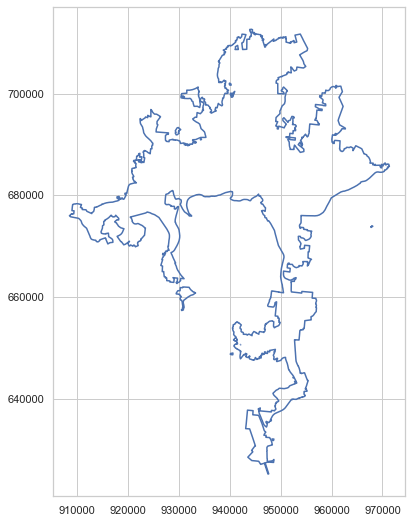

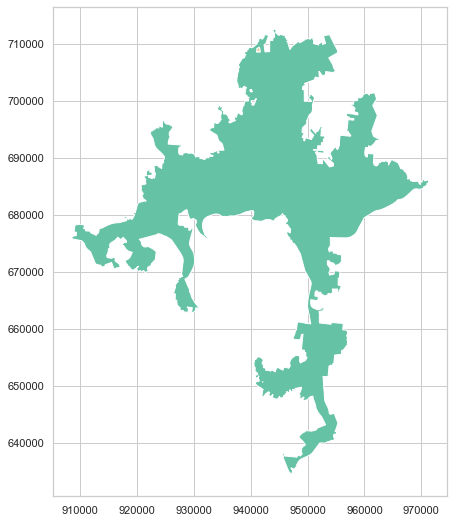

In [322]:
import json
from shapely.geometry import Polygon, mapping
import geopandas as gpd
import pandas as pd
import itertools
import shapely

# Path to your polygons file
shp_path = '../Airbnb_Asheville/Asheville_City_Limits/Asheville_City_Limits.shp'
gdf = gpd.read_file(shp_path)
gdf.boundary.plot()

def get_intersections(i):
    # Current polygon
    current = gdf.iloc[i]
    # All other polygons with current dropped
    others = gdf.drop(i)
    # Get all other intersections with current
    ix = [current.geometry.intersection(other) for other in others.geometry if current.geometry.intersects(other)]
    if ix:
        s = pd.concat([gpd.GeoSeries(current.geometry), gpd.GeoSeries(ix)])
        # Get all combinations of intersections
        all_ix = [a.intersection(b) for a, b in list(itertools.combinations(s, 2))]
        return pd.concat([gpd.GeoSeries(current.geometry), gpd.GeoSeries(all_ix)])
    else:
        return gpd.GeoSeries(current.geometry)

s = get_intersections(9)
polys = list(shapely.ops.polygonize(s.boundary.unary_union))
polys = gpd.GeoSeries(polys)
polys.plot(cmap='Set2')


In [305]:
geom2 = ashvile_list[['latitude', 'longitude','neighbourhood_cleansed','room_type']]
geom2 = geom2.rename(columns={'neighbourhood_cleansed': 'neighbourhood'})
geometry = [Point(xy) for xy in zip (geom2["latitude"], geom2["longitude"])]
geometry[:3]

[<POINT (35.607 -82.556)>, <POINT (35.579 -82.596)>, <POINT (35.579 -82.596)>]

In [324]:
crs = {'init': 'epsg:3857'}
#crs = {'init': 'EPSG:4326'}
geo_df = gpd.GeoDataFrame(geom2,crs=crs, geometry=geometry)
geo_df.head()

,latitude,longitude,neighbourhood,room_type,geometry
0,35.60670,-82.55563,28801,Entire home/apt,POINT (35.607 -82.556)
1,35.57864,-82.59578,28806,Entire home/apt,POINT (35.579 -82.596)
2,35.57864,-82.59578,28806,Private room,POINT (35.579 -82.596)
3,35.57864,-82.59578,28806,Shared room,POINT (35.579 -82.596)
4,35.57808,-82.63689,28806,Private room,POINT (35.578 -82.637)


<AxesSubplot:>

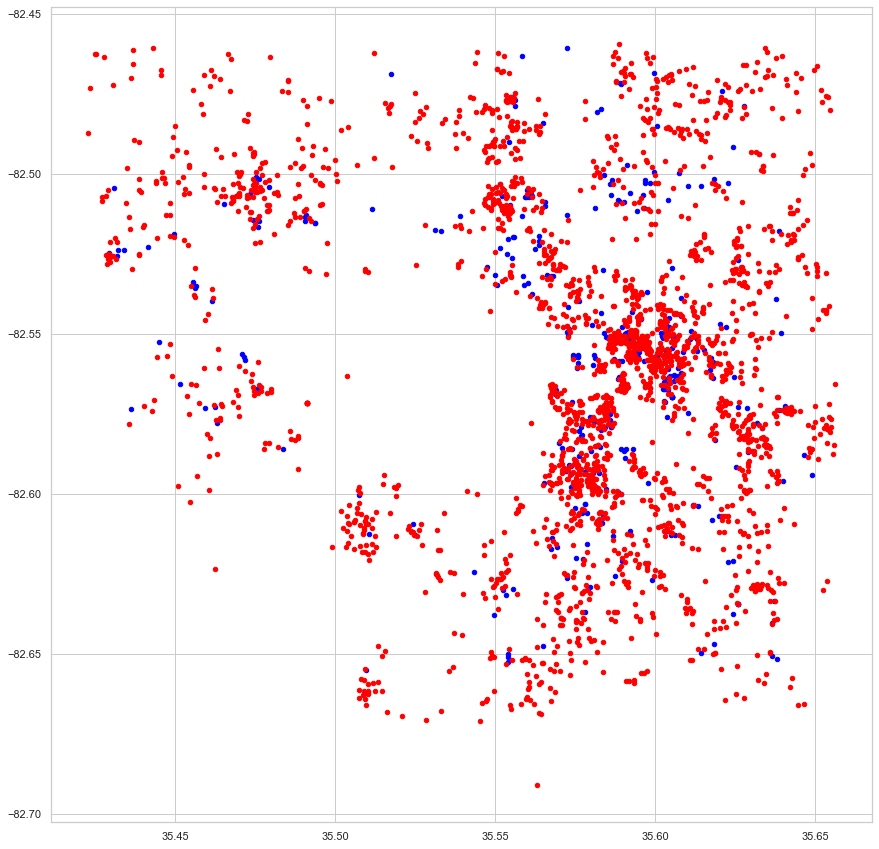

In [325]:
fig,ax = plt.subplots(figsize=(15,15))
geo_df[geo_df['room_type']== 'Private room'].plot(ax=ax, markersize=20, color='blue', marker="o",label="home/apt")
geo_df[geo_df['room_type']== 'Entire home/apt'].plot(ax=ax, markersize=20, color='red', marker="o",label="Private room")
#gdf.plot(ax=ax, alpha=0.4, color='gray')

